In [3]:
import pandas as pd

df = pd.read_csv("Tweets.csv")


In [5]:
# Check duplicates (whole row)
print("Duplicate rows:", df.duplicated().sum())

# Check duplicates in text only (since no 'title' column in Twitter data)
print("Duplicate tweets:", df.duplicated(subset=["text"]).sum())

# Check missing values
print("Missing values per column:\n", df.isnull().sum())

# Check outliers in text length (word count)
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))
print(df['text_length'].describe())

Duplicate rows: 0
Duplicate tweets: 0
Missing values per column:
textID           0
text             1
selected_text    1
sentiment        0
dtype: int64
count    27481.000000
mean        12.902442
std          6.926185
min          1.000000
25%          7.000000
50%         12.000000
75%         18.000000
max         33.000000
Name: text_length, dtype: float64


In [6]:
# Remove duplicates
df = df.drop_duplicates()

# Drop rows with missing values
df = df.dropna()

# Remove articles that are too short (example: <20 words)
df = df[df['text_length'] > 20]

# Save cleaned file
df.to_csv("Tweets_cleaned.csv", index=False)

print("✅ Cleaned dataset saved as Tweets_cleaned.csv")
print("New shape:", df.shape)

✅ Cleaned dataset saved as Tweets_cleaned.csv
New shape: (4831, 5)


In [7]:
print(df.isnull().sum())

textID           0
text             0
selected_text    0
sentiment        0
text_length      0
dtype: int64


In [10]:
df.dropna(inplace=True)

In [11]:
df.head(10)

,textID,text,selected_text,sentiment,text_length
10,2339a9b08b,"as much as i love to be hopeful, i reckon the...","as much as i love to be hopeful, i reckon the ...",neutral,23
17,919fa93391,i`ve been sick for the past few days and thus...,sick,negative,25
21,e48b0b8a23,Playing Ghost Online is really interesting. Th...,interesting.,positive,24
28,6ce4a4954b,juss came backk from Berkeleyy ; omg its madd ...,fun,positive,22
32,1c31703aef,If it is any consolation I got my BMI tested ...,well so much for being unhappy for about 10 mi...,negative,26
37,1cbc812ece,"just in case you wonder, we are really busy to...","just in case you wonder, we are really busy to...",neutral,24
43,684081e4e7,RATT ROCKED NASHVILLE TONITE..ONE THING SUCKED...,RATT ROCKED NASHVILLE TONITE..ONE THING SUCKED...,neutral,25
48,3d9d4b0b55,"i donbt like to peel prawns, i also dont like ...",dont like go,negative,24
63,90a2cdb657,What better way to spoil mum than to let her k...,favorite,positive,30
72,04e2e334de,Anyone have an extra Keane ticket? I promise t...,Anyone have an extra Keane ticket? I promise t...,neutral,25


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4831 entries, 10 to 27478
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         4831 non-null   object
 1   text           4831 non-null   object
 2   selected_text  4831 non-null   object
 3   sentiment      4831 non-null   object
 4   text_length    4831 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 226.5+ KB


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("Tweets.csv")

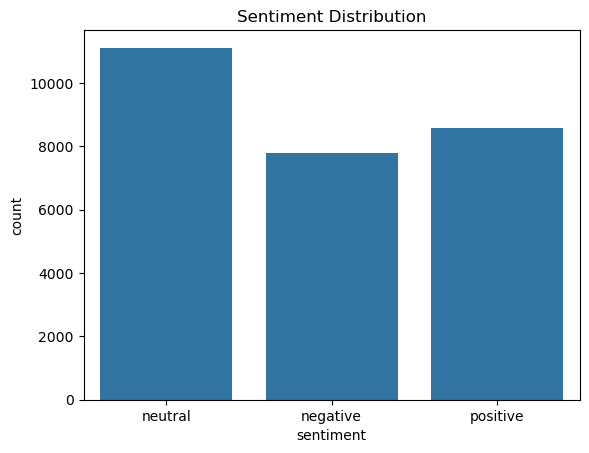

In [6]:
#1.Bar Chart- Sentiment Count 
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("Tweets.csv")

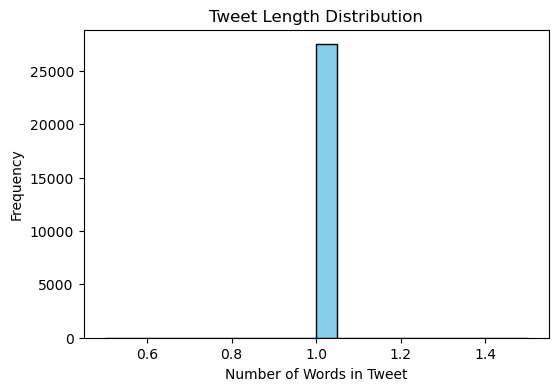

In [16]:
#2.Histogram - Tweet Lenght 
plt.figure(figsize=(6,4))
plt.hist(df['text_length'], bins=20, color='skyblue', edgecolor='black')
plt.title("Tweet Length Distribution")
plt.xlabel("Number of Words in Tweet")
plt.ylabel("Frequency")
plt.show()

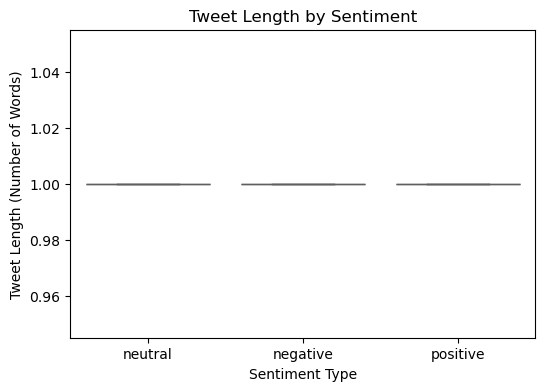

In [18]:
#3.Boxplot - Text Lenght by Sentiment
plt.figure(figsize=(6,4))
sns.boxplot(x='sentiment', y='text_length', data=df, hue='sentiment', palette='cool', legend=False)
plt.title("Tweet Length by Sentiment")
plt.xlabel("Sentiment Type")
plt.ylabel("Tweet Length (Number of Words)")
plt.show()


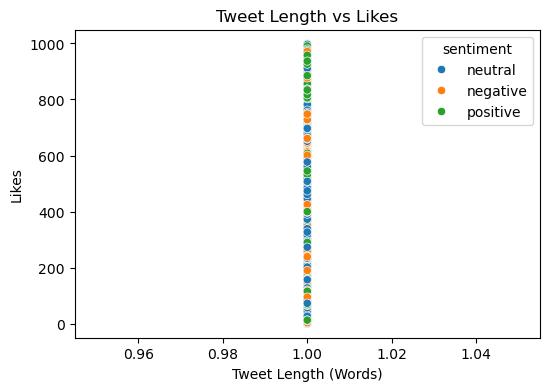

In [19]:
#4.Scatter Plot - Random likes vs Text Lenght
df['likes'] = np.random.randint(0, 1000, len(df))

plt.figure(figsize=(6,4))
sns.scatterplot(x='text_length', y='likes', hue='sentiment', data=df)
plt.title("Tweet Length vs Likes")
plt.xlabel("Tweet Length (Words)")
plt.ylabel("Likes")
plt.show()

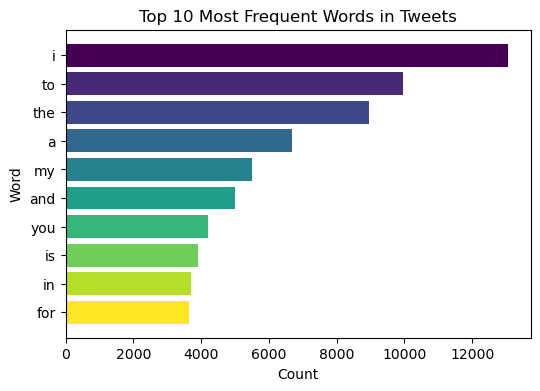

In [21]:
#5.Bar Chart - Top 10 Words
import numpy as np

# prepare data (same as above)
words = list(chain.from_iterable(df['text'].dropna().str.lower().str.split()))
common_words = pd.DataFrame(Counter(words).most_common(10), columns=['Word', 'Count'])

plt.figure(figsize=(6,4))
colors = plt.cm.viridis(np.linspace(0, 1, len(common_words)))
plt.barh(common_words['Word'], common_words['Count'], color=colors)
plt.gca().invert_yaxis()   # largest bar on top
plt.title("Top 10 Most Frequent Words in Tweets")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()
